# **Programming for Applied Deep Learning (GKSG008-01)**
> ### **20181202 김수미**
> ### MNIST Experiment 2 (Based on 11/11 Lecture)

1. Load MNIST Dataset
2. Make a network with 'class MyNetClass(nn.Module)'
3. Make two instances 'netSeq' and 'netClass'
4. Train the two with the same training.
5. Compare the results.
 
- Extra Experiments (extra, if you are interested)
 * Define and use a multiple layer network to get better test accuracy.
 * GPU : use cuda device to have better speed.

### **1. Load MNIST Dataset**

**◦ Import Libraries and Define Functions**

In [ ]:
pip install d2l

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.utils.data as data
import warnings
warnings.filterwarnings('ignore')

from d2l.torch import *
from torch import nn
from d2l import torch as d2l
from torch.utils.data import DataLoader

In [3]:
def load_data_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
      trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.MNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.MNIST(root="../data",train=False,transform=trans,download=True)
    return(data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=4),
           data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4))

In [4]:
def my_train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

    print("Final train loss : {:.4f}".format(train_loss))

### **2. Make a network with 'class MyNetClass(nn.Module)'.**
+) Used Code form **Textbook : 5.1.2. The Sequential Block - class MySequential(nn.Module)**

In [12]:
class MyNetClass(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args):
            self._modules[str(idx)] = module
    def forward(self, X):
        for block in self._modules.values():
            X = block(X)
        return X

### **3. Make two instances 'netSeq' and 'netClass' (same parameters).**

In [17]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

**◦ Define netSeq (original sequential network)**

In [6]:
netSeq = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
netSeq.apply(init_weights);

**◦ Define netClass (new network)**

In [16]:
netClass = MyNetClass(nn.Flatten(), nn.Linear(784, 10))
netClass.apply(init_weights);

### **4. Train the two with the same training.**

**◦ Load Dataset (MNIST)**

In [ ]:
batch_size = 256
train_iter, test_iter = load_data_mnist(batch_size)

**◦ netSeq Training Result**

Final train loss : 0.3117


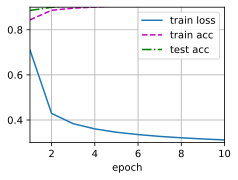

In [9]:
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(netSeq.parameters(), lr=0.1)
num_epochs = 10
my_train_ch3(netSeq, train_iter, test_iter, loss, num_epochs, trainer)

In [10]:
# Test Accuracy
print("< netSeq Training Result >")
for x,y in test_iter:
  pred = netSeq(x)
  test_pred = torch.argmax(pred, dim=1)
  break
result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = netSeq(x)
  train_pred = torch.argmax(pred, dim=1)
  break
result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

< netSeq Training Result >
>> Test Accuracy :  94.921875 %
>> Train Accuracy :  89.453125 %


**◦ netClass Training Result**

Final train loss : 0.3116


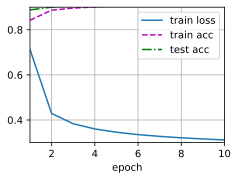

In [18]:
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(netClass.parameters(), lr=0.1)
num_epochs = 10
my_train_ch3(netClass, train_iter, test_iter, loss, num_epochs, trainer)

In [20]:
# Test Accuracy
print("< netClass Training Result >")
for x,y in test_iter:
  pred = netClass(x)
  test_pred = torch.argmax(pred, dim=1)
  break
result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = netClass(x)
  train_pred = torch.argmax(pred, dim=1)
  break
result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

< netClass Training Result >
>> Test Accuracy :  94.140625 %
>> Train Accuracy :  92.96875 %


### **5. Compare the results.**

- **netSeq Training Result**
  * Final train loss : 0.3117
  * Test Accuracy :  94.921875 %
  * Train Accuracy :  89.453125 %

- **netClass Training Result**
  * Final train loss : 0.3116
  * Test Accuracy :  94.140625 %
  * Train Accuracy :  92.96875 %

### **+) Extra Experiments**
- GPU : use cuda device to have better speed : Colab GPU
- Define and use a multiple layer network to get better test accuracy.


**◦ GPU provided by Google Colab**

In [21]:
!nvidia-smi

Sat Nov 13 10:54:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**◦ Define and use a multiple layer network**

In [79]:
class MyMLPClass(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.hidden1 = nn.Linear(784, 512)  # Hidden layer 1
        self.hidden2 = nn.Linear(512, 256)  # Hidden layer 2
        self.out = nn.Linear(256, 10)  # Output layer
        self.seq = nn.Sequential()
    def forward(self, X):
        return self.seq(self.out(self.hidden2(F.relu(self.hidden1(self.flatten(X))))))

In [80]:
netMLP = MyMLPClass()
netMLP.apply(init_weights);

Final train loss : 0.1207


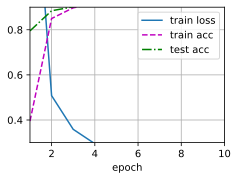

In [81]:
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(netMLP.parameters(), lr=0.1)
num_epochs = 10
my_train_ch3(netMLP, train_iter, test_iter, loss, num_epochs, trainer)

In [82]:
# Test Accuracy
print("< netMLP Training Result >")
for x,y in test_iter:
  pred = net(x)
  test_pred = torch.argmax(pred, dim=1)
  break
result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = net(x)
  train_pred = torch.argmax(pred, dim=1)
  break
result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

< netMLP Training Result >
>> Test Accuracy :  96.09375 %
>> Train Accuracy :  94.53125 %
